<a href="https://colab.research.google.com/github/vimalkumarasamy/computer_vision/blob/master/CV_Task2_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [11]:
cd /content/gdrive/My Drive/Computer_Vision

/content/gdrive/My Drive/Computer_Vision


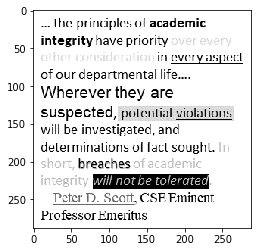

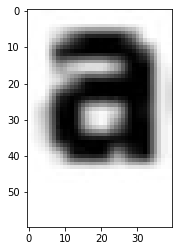

In [18]:
import utils 
import numpy as np
import copy
import cv2
import argparse
import os
import matplotlib.pyplot as plt
from task1 import *

img_path='proj1-task2-png.png'
img=read_image(img_path)
img_path='a.jpg'
template=read_image(img_path)

plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(template, cmap="gray")
plt.show()

In [0]:
import math
hogs_x=[-1,1]
hogs_img_x=copy.deepcopy(img)
hogs_grad_x=copy.deepcopy(img)
for i in range(len(hogs_img_x)):
  hogs_img_x[i]=hogs_img_x[i]+[0]
hogs_y=[1,-1]
hogs_img_y=copy.deepcopy(img)
hogs_grad_y=copy.deepcopy(img)
hogs_img_y=hogs_img_y+(np.zeros((1, len(hogs_img_y[0]))).tolist())

for i in range(len(img)):
  for j in range(len(img[0])):
    hogs_grad_x[i][j]=(hogs_img_x[i][j]*hogs_x[0])+(hogs_img_x[i][j+1]*hogs_x[1])
    hogs_grad_y[i][j]=(hogs_img_y[i][j]*hogs_y[0])+(hogs_img_y[i+1][j]*hogs_y[1])

hogs_grad_x=normalize(hogs_grad_x)
hogs_grad_y=normalize(hogs_grad_y)
hogs_grad=copy.deepcopy(img)
for i in range(len(hogs_grad)):
  for j in range(len(hogs_grad[0])):
    if hogs_grad_x[i][j]==0:
      hogs_grad[i][j]=math.pi/2
    else:
      hogs_grad[i][j]=math.atan(hogs_grad_y[i][j]/hogs_grad_x[i][j])
    pass





In [61]:
val_max=-1
val_min=300
for i in hogs_grad:
  for j in i:
    if j>val_max:
      val_max=j
    if j<val_min:
      val_min=j
print(val_max)
print(val_min)

1.5707963267948966
0.0


In [58]:
math.atan(1)

0.7853981633974483

In [59]:
3.142/4

0.7855